In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas.util.testing as tm
import matplotlib.pyplot as plt

<ipython-input-1-e22421c76c42>:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The dataset has been fetched from https://www.kaggle.com/datasets/yasserh/wine-quality-dataset for Wine Quality Prediction

In [2]:
# Fetching the dataset

data = pd.read_csv("/content/WineQT.csv")

# No.of rows & columns within the dataset

data.shape

(1143, 13)

In [3]:
# Displaying the first few rows using the head() function

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
# Checking for null values

data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [5]:
# Checking for duplicate values

data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1138    False
1139    False
1140    False
1141    False
1142    False
Length: 1143, dtype: bool

In [6]:
# Get details about the data

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [7]:
# Data shuffling for even distribution

data = data.sample(frac = 1).reset_index(drop = True)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'Id']


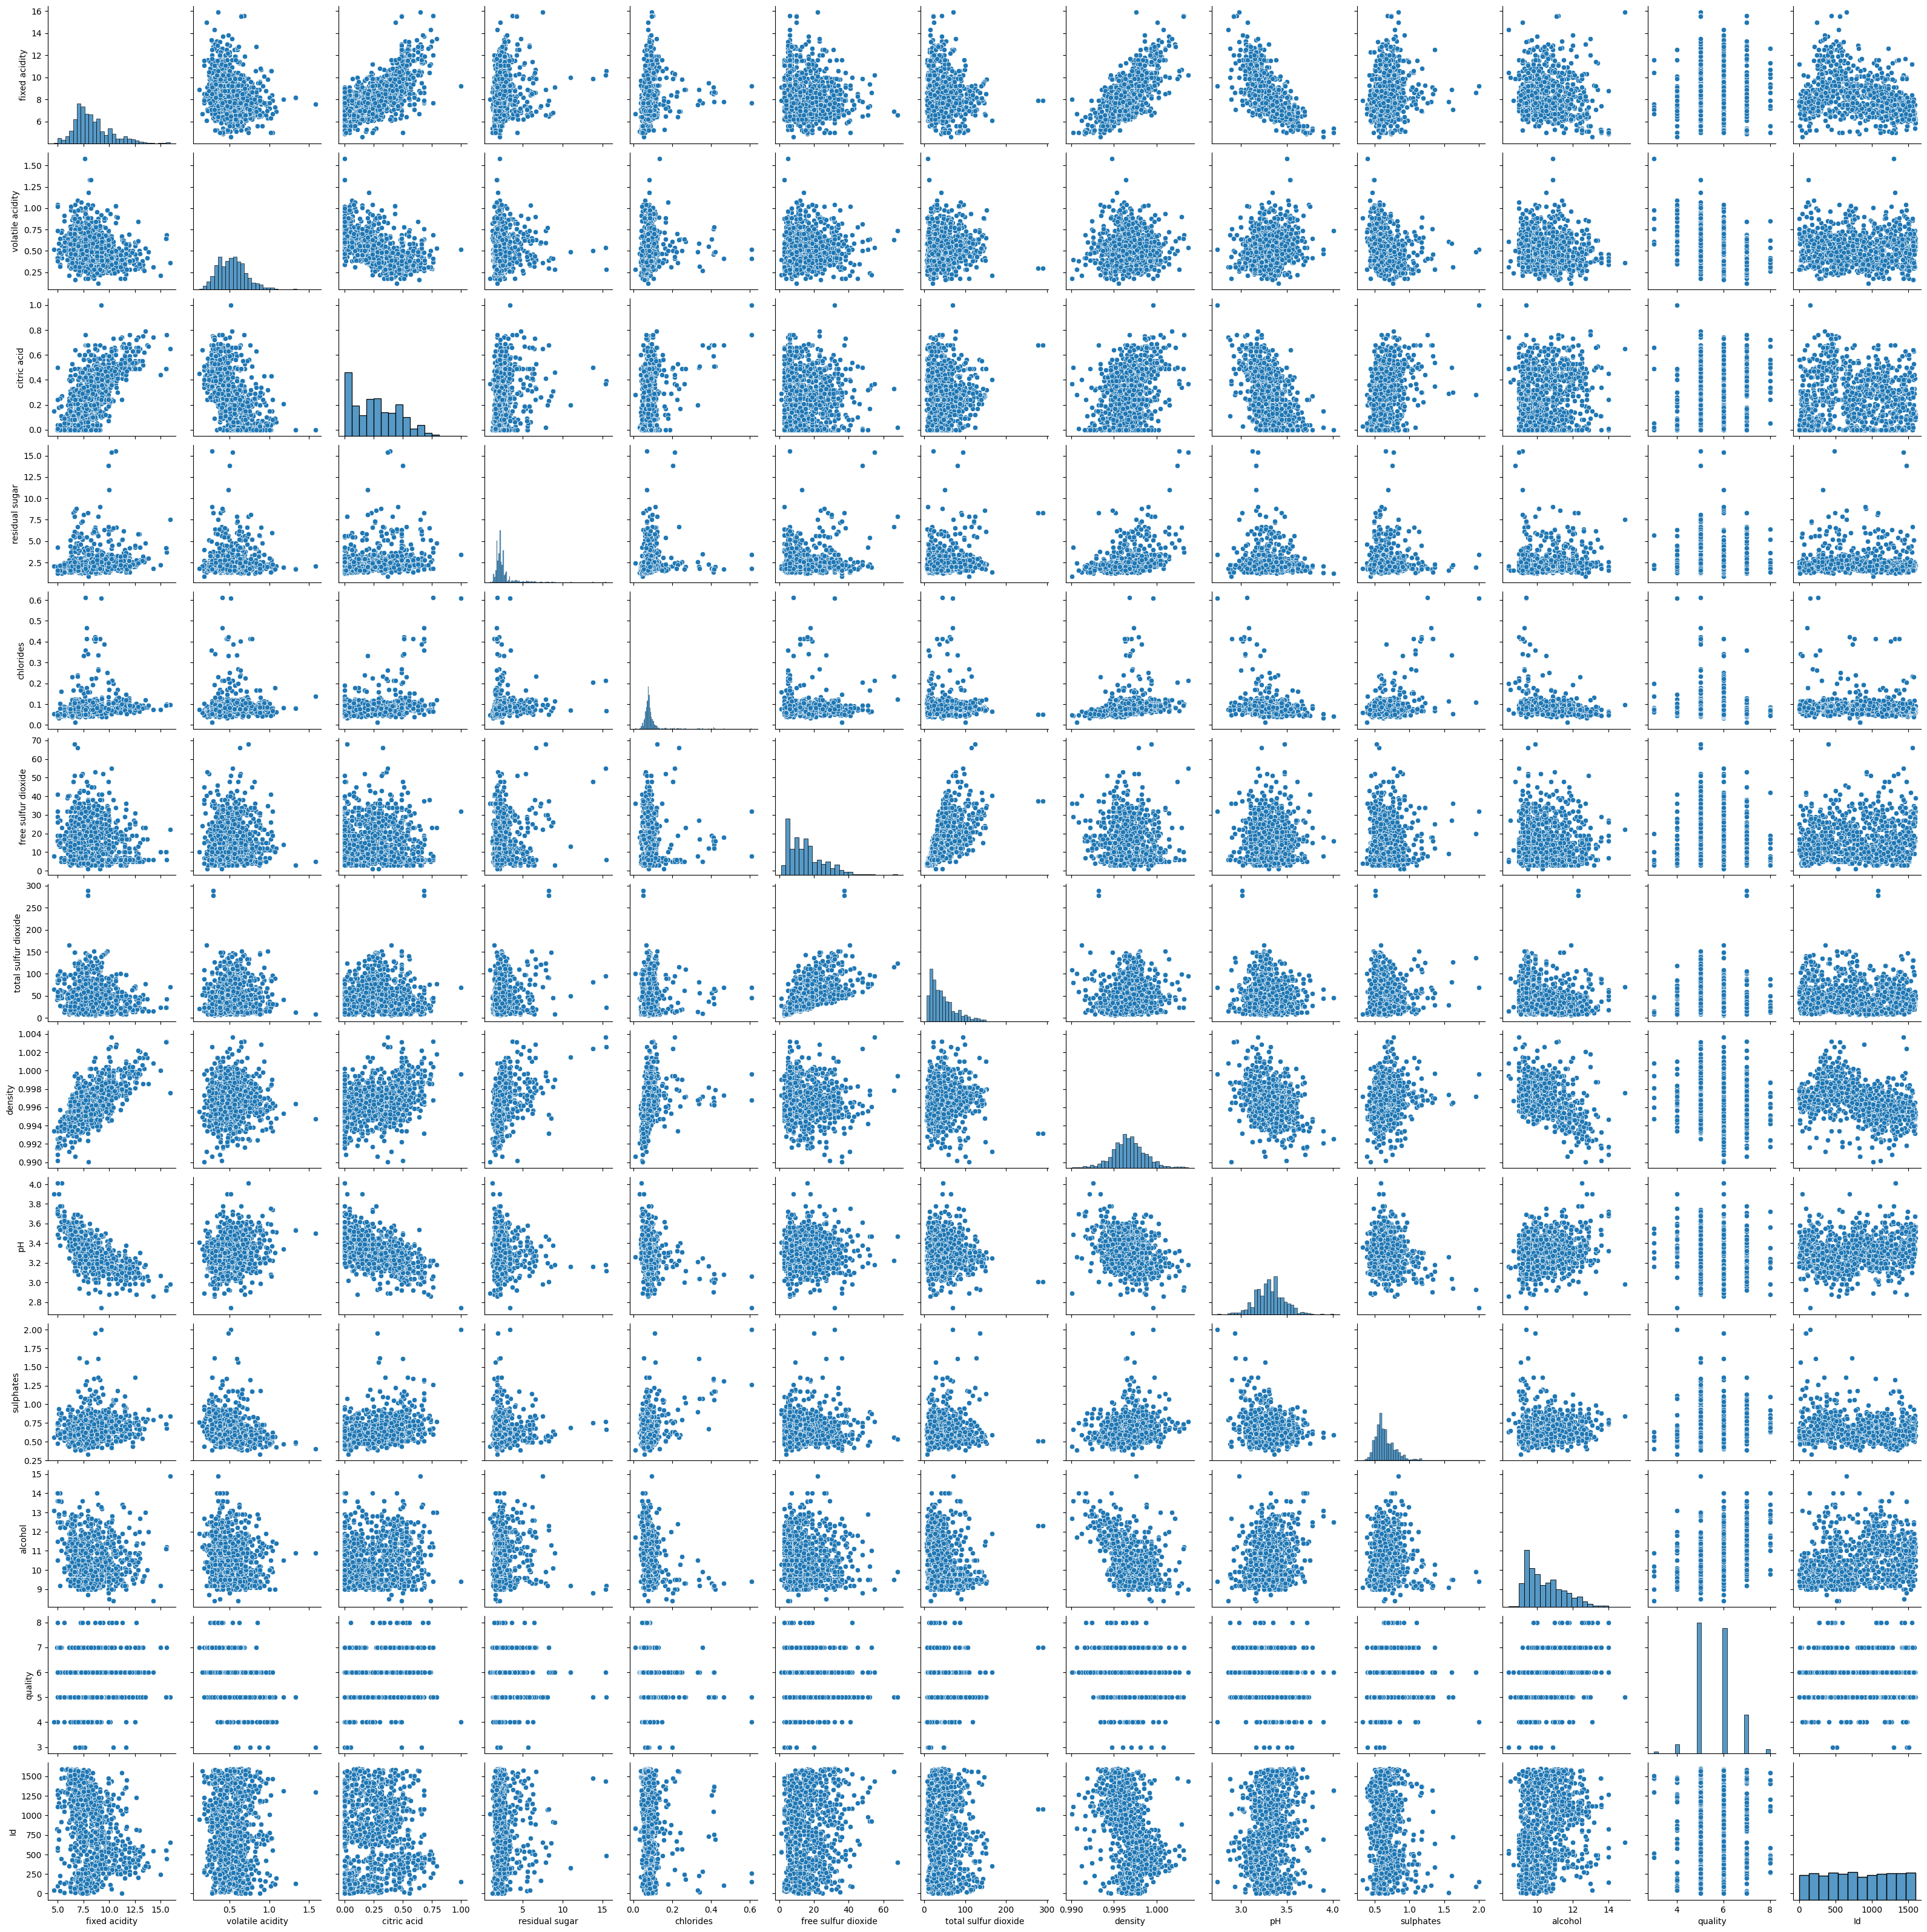

In [10]:
# Visualize pairplot

import seaborn as sns
columns_names = list(data.columns)
print(columns_names)

data_types = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'Id']]
sns.pairplot(data_types)

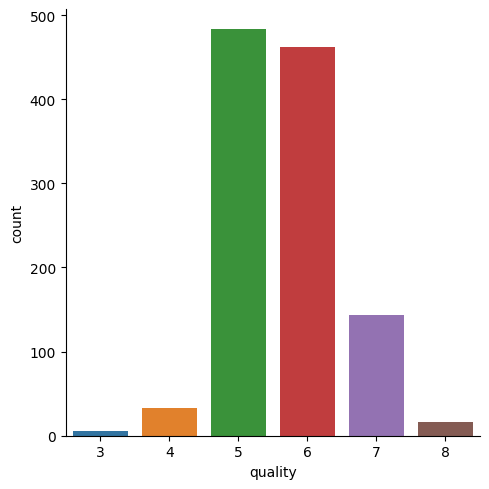

In [9]:
# No.of values for each quality parameter

sns.catplot(x = 'quality', data = data, kind = 'count')

***DATA ANALYSIS FOR INDIVIDUAL PARAMETERS***

<Axes: xlabel='quality', ylabel='fixed acidity'>

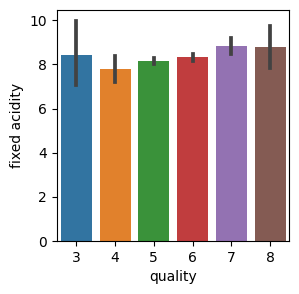

In [11]:
# fixed acidity vs quality analysis

plot = plt.figure(figsize = (3,3))
sns.barplot(x = 'quality', y = 'fixed acidity', data = data)

<Axes: xlabel='quality', ylabel='volatile acidity'>

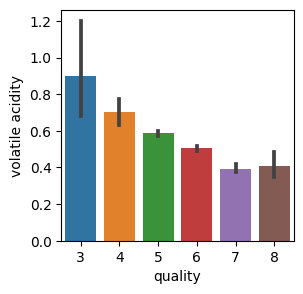

In [12]:
# volatile acidity vs quality analysis

plot = plt.figure(figsize = (3,3))
sns.barplot(x = 'quality', y = 'volatile acidity', data = data)

Here we can see that somehow, Volatile acidity is **inversely proportional** to Quality of wine


<Axes: xlabel='quality', ylabel='citric acid'>

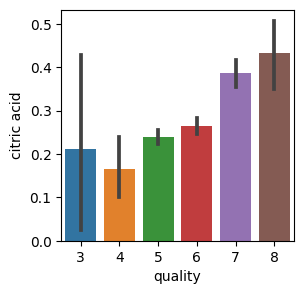

In [13]:
# citric acid vs quality analysis

plot = plt.figure(figsize = (3,3))
sns.barplot(x = 'quality', y = 'citric acid', data = data)

Here we can see that somehow, Citric acid is **directly proportional** to Quality of wine

*Similary, the other parameters are also analyzed...*

<Axes: xlabel='quality', ylabel='residual sugar'>

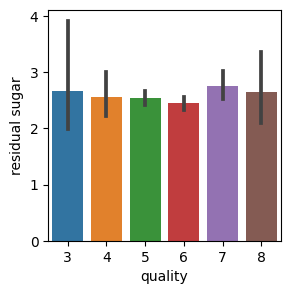

In [14]:
# residual sugar vs quality analysis

plot = plt.figure(figsize = (3,3))
sns.barplot(x = 'quality', y = 'residual sugar', data = data)

<Axes: xlabel='quality', ylabel='chlorides'>

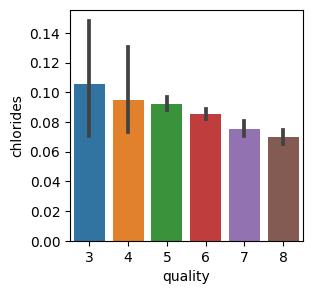

In [15]:
# chlorides vs quality analysis

plot = plt.figure(figsize = (3,3))
sns.barplot(x = 'quality', y = 'chlorides', data = data)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

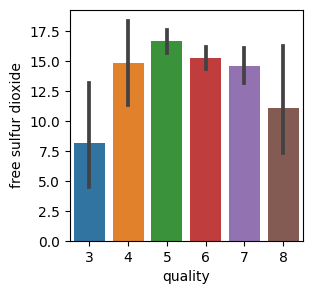

In [16]:
# free sulfur dioxide vs quality analysis

plot = plt.figure(figsize = (3,3))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = data)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

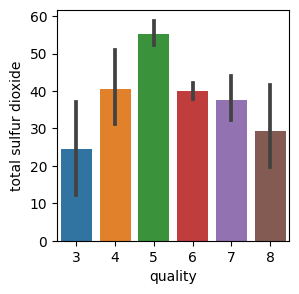

In [17]:
# total sulfur dioxide vs quality analysis

plot = plt.figure(figsize = (3,3))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = data)

<Axes: xlabel='quality', ylabel='density'>

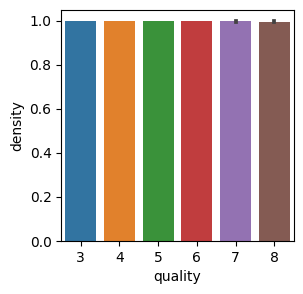

In [18]:
# density vs quality analysis

plot = plt.figure(figsize = (3,3))
sns.barplot(x = 'quality', y = 'density', data = data)

<Axes: xlabel='quality', ylabel='pH'>

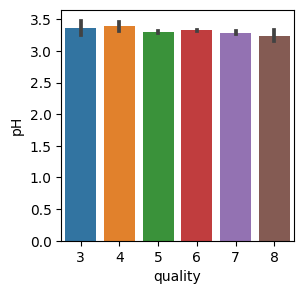

In [19]:
# pH vs quality analysis

plot = plt.figure(figsize = (3,3))
sns.barplot(x = 'quality', y = 'pH', data = data)

<Axes: xlabel='quality', ylabel='sulphates'>

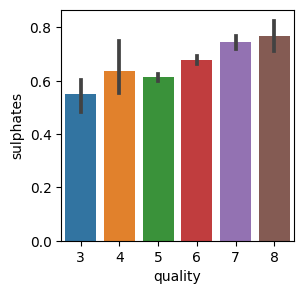

In [20]:
# sulphates vs quality analysis

plot = plt.figure(figsize = (3,3))
sns.barplot(x = 'quality', y = 'sulphates', data = data)

<Axes: xlabel='quality', ylabel='alcohol'>

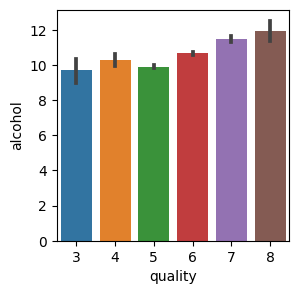

In [21]:
# alcohol vs quality analysis

plot = plt.figure(figsize = (3,3))
sns.barplot(x = 'quality', y = 'alcohol', data = data)

*CORRELATION*

<Axes: >

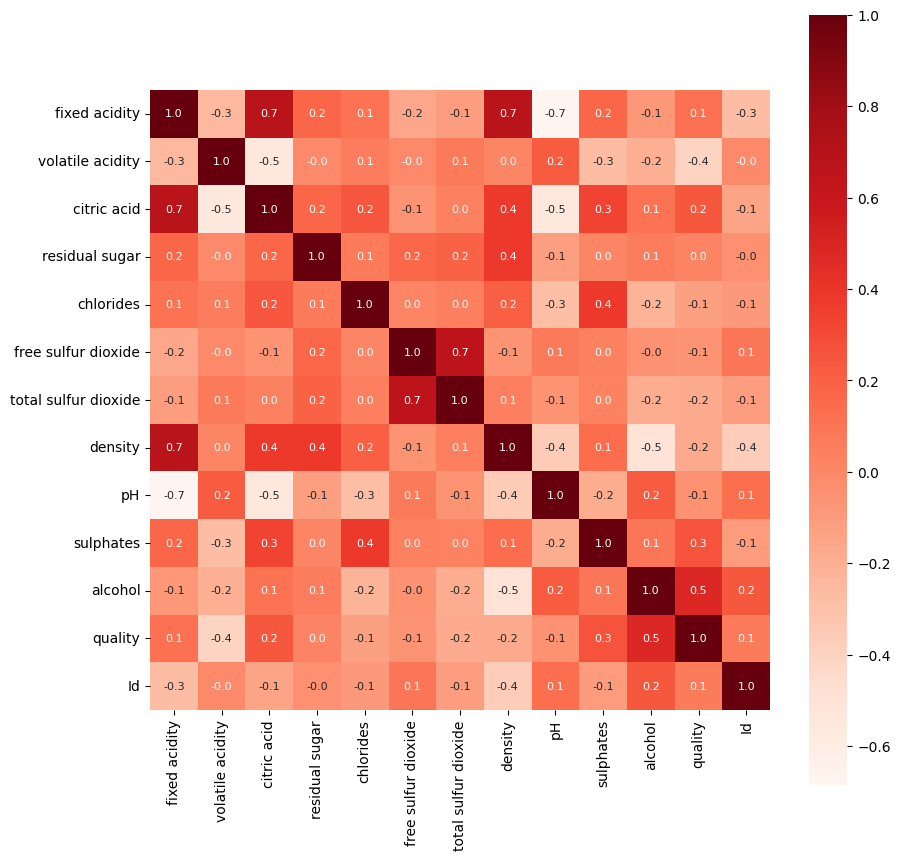

In [22]:
correlation = data.corr()

plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':8}, cmap = 'Reds')

*DATA PRE - PROCESSING*

In [23]:
x = data.drop(['quality', 'Id'], axis = 1)
print(x)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0              13.3             0.290         0.75             2.8      0.084   
1              12.9             0.500         0.55             2.8      0.072   
2               6.4             0.640         0.21             1.8      0.081   
3               8.4             0.620         0.12             1.8      0.072   
4               7.9             0.340         0.36             1.9      0.065   
...             ...               ...          ...             ...        ...   
1138           12.3             0.390         0.63             2.3      0.091   
1139           12.0             0.380         0.56             2.1      0.093   
1140            8.8             0.440         0.49             2.8      0.083   
1141            9.9             0.630         0.24             2.4      0.077   
1142            7.0             0.975         0.04             2.0      0.087   

      free sulfur dioxide  

*Label Encoding of Quality*

In [24]:
y = data['quality'].apply(lambda y_value: 1 if y_value > 6 else 0)
print(y)

0       1
1       0
2       0
3       0
4       1
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: quality, Length: 1143, dtype: int64


Splitting the dataset

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2529)

print(y.shape, y_train.shape, y_test.shape)

(1143,) (800,) (343,)


Model Training

In [26]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

Model Evaluation

In [27]:
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

print("Model accuracy is : ", test_data_accuracy)

Model accuracy is :  0.8892128279883382


Make Predictions

In [28]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')


Bad Quality Wine


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
